#  SWMAL Opgave

## Dataanalyse

### Qa) Beskrivelse af datasæt til O4 projekt

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget
bestemt, lave en regression eller klassifikation, el.lign. 

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.


### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


#### NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

In [111]:
import os
import re

img_dir = "C:/Projects/SWMAL/real_and_fake_face/training_fake"
dir_list = os.listdir(img_dir)

pattern = "(\w+)_(\d+)_(\d)(\d)(\d)(\d).jpg"
total = [0, 0, 0, 0, 0]
for i in dir_list:
    result = re.match(pattern, i)
    left, right, nose, mouth = result.group(3, 4, 5, 6)
    total[0] += int(left)
    total[1] += int(right)
    total[2] += int(nose)
    total[3] += int(mouth)
    total[4] += 1
  
print(total)


[678, 678, 647, 652, 960]


In [75]:
import os
from PIL import Image

img_dir = "C:/Projects/SWMAL/real_and_fake_face/training_fake"
#name = "easy_1_1110.jpg"
#img = Image.open(img_dir + "/" + name)
dir_list = os.listdir(img_dir)

for name in range(10):
    img = Image.open(img_dir + "/" + dir_list[name])
    r_list = []
    g_list = []
    b_list = []
    for x in range(600):
        for y in range(600):
            r, g, b = img.getpixel((x, y))
            r_list.append(r)
            g_list.append(g)
            b_list.append(b)
    print(f"{dir_list[name]}")
    print(f"R: {sum(r_list)/len(r_list)}")
    print(f"G: {sum(g_list)/len(g_list)}")
    print(f"B: {sum(b_list)/len(b_list)}")

easy_100_1111.jpg
R: 138.32224166666666
G: 115.63047222222222
B: 83.28405277777777
easy_101_0010.jpg
R: 131.32065
G: 105.93905833333334
B: 87.22105
easy_102_0101.jpg
R: 110.16915555555556
G: 85.66137222222223
B: 65.98336944444445
easy_103_1111.jpg
R: 155.33610277777777
G: 113.61043055555555
B: 102.46194444444444
easy_104_1000.jpg
R: 197.37028333333333
G: 176.79910833333332
B: 167.05466944444444
easy_105_1100.jpg
R: 133.76128055555554
G: 113.83376111111112
B: 108.65727222222222
easy_106_0011.jpg
R: 163.180875
G: 141.20743333333334
B: 129.71388333333334
easy_107_1011.jpg
R: 156.17805277777776
G: 118.72894444444445
B: 99.68411666666667
easy_108_1111.jpg
R: 135.60375
G: 112.1897
B: 103.34115555555556
easy_109_1111.jpg
R: 99.75889444444445
G: 83.49429722222222
B: 77.54935555555555


{(600, 600)}


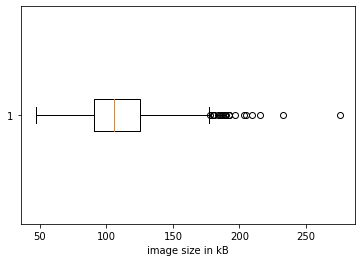

In [122]:
import os
from PIL import Image
from matplotlib import pyplot as plt

img_dir = "C:/Projects/SWMAL/real_and_fake_face/training_fake"
dir_list = os.listdir(img_dir)

sizes = []

for name in dir_list:
    img = Image.open(img_dir + "/" + name)
    sizes.append(img.size)

img_dir = "C:/Projects/SWMAL/real_and_fake_face/training_real"
dir_list = os.listdir(img_dir)

for name in dir_list:
    img = Image.open(img_dir + "/" + name)
    sizes.append(img.size)

file_size = []
for name in dir_list:
    file_size.append(os.path.getsize(img_dir + "/" + name) / 1024)

plt.xlabel("image size in kB")
plt.yticks([])
plt.boxplot(file_size, vert=False)
plt.savefig("./box_file_size.png", dpi=300, format="png")

print(set(sizes))

In [ ]:
import os
from PIL import Image

img_dir = "C:/Projects/SWMAL/real_and_fake_face/training_fake"
dir_list = os.listdir(img_dir)

for name in dir_list:
  sizes.append(os.path.getsize(name))
plt.hist(sizes)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

REVISIONS||
---------||
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.